In [1]:
from math import log
import matplotlib.pyplot as plt
import re, glob, os
%matplotlib inline

# Baseline (assignment 1.2.1)

### Extracting all baseline files and running times

In [2]:
quick_times = [(1,1)]
heap_times = [(1,1)]
your_times = [(1,1)]
your_OPT_times = [(1,1)]

algorithms = [quick_times,heap_times,your_times,your_OPT_times]
names = ['Quicksort','Heapsort','Yoursort','Yoursort_OPT']

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract baseline data
for file in glob.glob("*baseline*"):
    f = open(file,"r");
    # The regular expression below was inspired by the webpage: 
    # https://www.tutorialspoint.com/How-to-extract-numbers-from-a-string-in-Python
    # Extract numbers and put in a list
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
        
    # running time is the last number in numbers
    time = numbers[len(numbers)-1:][0]
    tupl = (n,time) 

    # put baseline data in the correct list
    if(re.search('quick',file)):
        quick_times.append(tupl)
    elif(re.search('heap',file)):
        heap_times.append(tupl)
    elif(re.search('yoursort_OPT',file)):
        your_OPT_times.append(tupl)
    elif(re.search('yoursort',file)):
        your_times.append(tupl)
        
    f.close() 

# sort lists by n and print the result
print("Baseline data: \n")
for i in range(len(algorithms)):
    algorithms[i] = sorted(algorithms[i], key=lambda tup: tup[0])
    print(names[i], "baseline:")
    for t in algorithms[i]:
        print(t, "\n")

Baseline data: 

Quicksort baseline:
(1, 1) 

(10, 1227) 

(100, 16146) 

(500, 90580) 

(1000, 193237) 

(5000, 1093553) 

(10000, 2325099) 

(50000, 12968805) 

(100000, 27708502) 

Heapsort baseline:
(1, 1) 

(10, 1242) 

(100, 20862) 

(500, 134431) 

(1000, 296831) 

(5000, 1824687) 

(10000, 3937219) 

(50000, 23114221) 

(100000, 49177406) 

Yoursort baseline:
(1, 1) 

(10, 1215) 

(100, 15846) 

(500, 89624) 

(1000, 191038) 

(5000, 1083981) 

(10000, 2304995) 

(50000, 12850346) 

(100000, 27454955) 

Yoursort_OPT baseline:
(1, 1) 

(10, 1137) 

(100, 15640) 

(500, 89794) 

(1000, 192228) 

(5000, 1108879) 

(10000, 2358263) 

(50000, 13249100) 

(100000, 28483606) 



### Plot baseline (running time in cycles per n-elements)

Quicksort 
 [(1, 1), (10, 1227), (100, 16146), (500, 90580), (1000, 193237), (5000, 1093553), (10000, 2325099), (50000, 12968805), (100000, 27708502)]
Heapsort 
 [(1, 1), (10, 1242), (100, 20862), (500, 134431), (1000, 296831), (5000, 1824687), (10000, 3937219), (50000, 23114221), (100000, 49177406)]
Yoursort 
 [(1, 1), (10, 1215), (100, 15846), (500, 89624), (1000, 191038), (5000, 1083981), (10000, 2304995), (50000, 12850346), (100000, 27454955)]
Yoursort_OPT 
 [(1, 1), (10, 1137), (100, 15640), (500, 89794), (1000, 192228), (5000, 1108879), (10000, 2358263), (50000, 13249100), (100000, 28483606)]


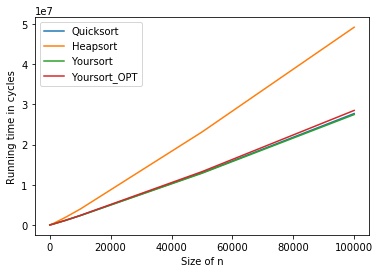

In [3]:
for i in range(len(algorithms)):
    algo = algorithms[i]
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles')
    plt.savefig("A3_running_time.pdf")

### Plot baseline (running time in cycles per one element)
#### OBS, script may only be run once or the tuples are divided again and again

Quicksort 
 [(1, 1.0), (10, 122.7), (100, 161.46), (500, 181.16), (1000, 193.237), (5000, 218.7106), (10000, 232.5099), (50000, 259.3761), (100000, 277.08502)]
Heapsort 
 [(1, 1.0), (10, 124.2), (100, 208.62), (500, 268.862), (1000, 296.831), (5000, 364.9374), (10000, 393.7219), (50000, 462.28442), (100000, 491.77406)]
Yoursort 
 [(1, 1.0), (10, 121.5), (100, 158.46), (500, 179.248), (1000, 191.038), (5000, 216.7962), (10000, 230.4995), (50000, 257.00692), (100000, 274.54955)]
Yoursort_OPT 
 [(1, 1.0), (10, 113.7), (100, 156.4), (500, 179.588), (1000, 192.228), (5000, 221.7758), (10000, 235.8263), (50000, 264.982), (100000, 284.83606)]


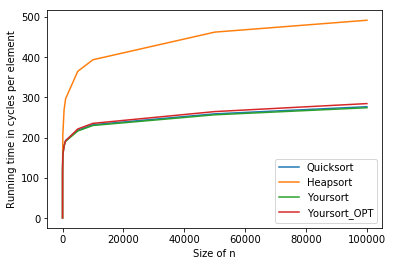

In [4]:
# helper function
def div(algo):
    algo_copy = algo
    for i in range(len(algo)):
        tup = algo[i]
        algo_copy[i] = int(tup[0]),(tup[1]/tup[0])
    return algo_copy 

for i in range(len(algorithms)):
    algo = div(algorithms[i])
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Running time in cycles per element')
    plt.savefig("A3_running_time_per_element.pdf")

# Delay (assignment 1.2.2)

### Extracting all delay files and running times and calculating AMAT

In [5]:
# Lists for cache misses
quick_miss_L1 = [(1,1)]
heap_miss_L1 = [(1,1)]
your_miss_L1 = [(1,1)]
your_OPT_miss_L1 = [(1,1)]

quick_miss_L2 = [(1,1)]
heap_miss_L2 = [(1,1)]
your_miss_L2 = [(1,1)]
your_OPT_miss_L2 = [(1,1)]

# Lists for AMAT
quick_AMAT_L1 = []
heap_AMAT_L1 = []
your_AMAT_L1 = []
your_OPT_AMAT_L1 = []

quick_AMAT_L2 = []
heap_AMAT_L2 = []
your_AMAT_L2 = []
your_OPT_AMAT_L2 = []

# Lists with all data from all algorithms
L1_cache_misses_algo = [quick_miss_L1,heap_miss_L1,your_miss_L1,your_OPT_miss_L1]
L2_cache_misses_algo = [quick_miss_L2,heap_miss_L2,your_miss_L2,your_OPT_miss_L2]
L1_AMAT_algo = [quick_AMAT_L1,heap_AMAT_L1,your_AMAT_L1,your_OPT_AMAT_L1]
L2_AMAT_algo = [quick_AMAT_L2,heap_AMAT_L2,your_AMAT_L2,your_OPT_AMAT_L2]

D_cache = 0
I_cache = 0
L1_miss = 0 # L1 is the sum of the D- and I-cache
L2_miss = 0

L1_miss_tupl = (0,0)
L2_miss_tupl = (0,0)

# AMAT = hit time + miss rate * miss penalty

# Hit times
L1_hit_time = 3 
L2_hit_time = 15
main_hit_time = 115

# Miss penalties
L1_miss_pen = L2_hit_time-L1_hit_time 
L2_miss_pen = main_hit_time-L2_hit_time 

# Miss rate variables
L1_miss_rate = 0
L2_miss_rate = 0

# AMAT variables
L1_AMAT = 0
L2_AMAT = 0

L1_AMAT_tupl = (0,0)
L2_AMAT_tupl = (0,0)

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# extract 
for file in glob.glob("*memory*"):
    f = open(file,"r");
    # extract only digits
    numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]  
    n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
            
    D_cache = numbers[21:22]
    I_cache = numbers[16:17]
    
    L1_miss = D_cache[0] + I_cache[0]
    L2_miss = numbers[11:12][0]
    
    L2_reads_writes = numbers[9:10][0]+numbers[10:11][0]
    L1_reads_writes = numbers[14:15][0]+numbers[15:16][0]+numbers[19:20][0]+numbers[20:21][0]
    
    L1_miss_rate = L1_miss/L1_reads_writes
    L2_miss_rate = L2_miss/L2_reads_writes
    
    L1_AMAT = L1_hit_time + (L1_miss_rate*L1_miss_pen)
    L2_AMAT = L2_hit_time + (L2_miss_rate*L2_miss_pen)
    
    # For plotting
    L1_AMAT_tupl = (n,L1_AMAT)
    L2_AMAT_tupl = (n,L2_AMAT)
    L1_miss_tupl = (n,round(L1_miss)) 
    L2_miss_tupl = (n,round(L2_miss)) 

    if(re.search('quick',file)):
        quick_miss_L1.append(L1_miss_tupl)
        quick_miss_L2.append(L2_miss_tupl)
        quick_AMAT_L1.append(L1_AMAT_tupl)
        quick_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('heap',file)):
        heap_miss_L1.append(L1_miss_tupl)
        heap_miss_L2.append(L2_miss_tupl)
        heap_AMAT_L1.append(L1_AMAT_tupl)
        heap_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('yoursort_OPT',file)):
        your_OPT_miss_L1.append(L1_miss_tupl)
        your_OPT_miss_L2.append(L2_miss_tupl)
        your_OPT_AMAT_L1.append(L1_AMAT_tupl)
        your_OPT_AMAT_L2.append(L2_AMAT_tupl)
    elif(re.search('yoursort',file)):
        your_miss_L1.append(L1_miss_tupl)
        your_miss_L2.append(L2_miss_tupl)
        your_AMAT_L1.append(L1_AMAT_tupl)
        your_AMAT_L2.append(L2_AMAT_tupl)
        
    f.close() 
    
# sort lists by n and print data

print("L1 delay data: \n")
for i in range(len(L1_cache_misses_algo)):
    L1_cache_misses_algo[i] = sorted(L1_cache_misses_algo[i], key=lambda tup: tup[0])
    print(names[i], ": cache misses:")
    for t in L1_cache_misses_algo[i]:
        print(t, "\n")
print("\nL2 delay data: \n")
for i in range(len(L2_cache_misses_algo)):
    L2_cache_misses_algo[i] = sorted(L2_cache_misses_algo[i], key=lambda tup: tup[0])
    print(names[i], ": cache misses:")
    for t in L2_cache_misses_algo[i]:
        print(t, "\n")
print("\nL1 AMAT data: \n")
for i in range(len(L1_AMAT_algo)):
    L1_AMAT_algo[i] = sorted(L1_AMAT_algo[i], key=lambda tup: tup[0])
    print(names[i], ": L1 AMAT:")
    for t in L1_AMAT_algo[i]:
        print(t, "\n")
print("\nL2 AMAT data: \n")
for i in range(len(L2_AMAT_algo)):
    L2_AMAT_algo[i] = sorted(L2_AMAT_algo[i], key=lambda tup: tup[0])
    print(names[i], ": L2 AMAT:")
    for t in L2_AMAT_algo[i]:
        print(t, "\n")

L1 delay data: 

Quicksort : cache misses:
(1, 1) 

(10, 31) 

(100, 85) 

(500, 291) 

(1000, 545) 

(5000, 5662) 

(10000, 15505) 

(50000, 113357) 

(100000, 273302) 

Heapsort : cache misses:
(1, 1) 

(10, 32) 

(100, 77) 

(500, 277) 

(1000, 528) 

(5000, 9830) 

(10000, 31342) 

(50000, 298933) 

(100000, 719393) 

Yoursort : cache misses:
(1, 1) 

(10, 32) 

(100, 86) 

(500, 292) 

(1000, 546) 

(5000, 5663) 

(10000, 15506) 

(50000, 113358) 

(100000, 273303) 

Yoursort_OPT : cache misses:
(1, 1) 

(10, 29) 

(100, 80) 

(500, 286) 

(1000, 541) 

(5000, 5627) 

(10000, 15372) 

(50000, 113025) 

(100000, 272653) 


L2 delay data: 

Quicksort : cache misses:
(1, 1) 

(10, 30) 

(100, 84) 

(500, 290) 

(1000, 543) 

(5000, 2553) 

(10000, 5060) 

(50000, 62357) 

(100000, 176034) 

Heapsort : cache misses:
(1, 1) 

(10, 31) 

(100, 76) 

(500, 276) 

(1000, 526) 

(5000, 2526) 

(10000, 5027) 

(50000, 115291) 

(100000, 350460) 

Yoursort : cache misses:
(1, 1) 

(10, 31) 


### Plot delay in L1 cache

Quicksort 
 [(1, 1), (10, 31), (100, 85), (500, 291), (1000, 545), (5000, 5662), (10000, 15505), (50000, 113357), (100000, 273302)]
Heapsort 
 [(1, 1), (10, 32), (100, 77), (500, 277), (1000, 528), (5000, 9830), (10000, 31342), (50000, 298933), (100000, 719393)]
Yoursort 
 [(1, 1), (10, 32), (100, 86), (500, 292), (1000, 546), (5000, 5663), (10000, 15506), (50000, 113358), (100000, 273303)]
Yoursort_OPT 
 [(1, 1), (10, 29), (100, 80), (500, 286), (1000, 541), (5000, 5627), (10000, 15372), (50000, 113025), (100000, 272653)]


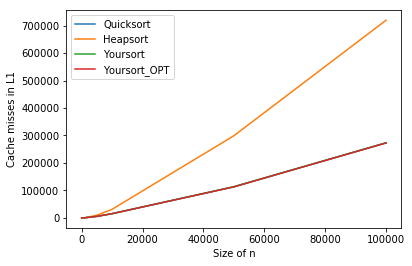

In [6]:
for i in range(len(L1_cache_misses_algo)):
    algo = L1_cache_misses_algo[i]
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Cache misses in L1')
    plt.savefig("A3_cache_misses_L1.pdf")

### Plot delay in L2 cache

Quicksort 
 [(1, 1), (10, 30), (100, 84), (500, 290), (1000, 543), (5000, 2553), (10000, 5060), (50000, 62357), (100000, 176034)]
Heapsort 
 [(1, 1), (10, 31), (100, 76), (500, 276), (1000, 526), (5000, 2526), (10000, 5027), (50000, 115291), (100000, 350460)]
Yoursort 
 [(1, 1), (10, 31), (100, 85), (500, 291), (1000, 544), (5000, 2554), (10000, 5061), (50000, 62357), (100000, 176035)]
Yoursort_OPT 
 [(1, 1), (10, 29), (100, 80), (500, 286), (1000, 540), (5000, 2540), (10000, 5052), (50000, 62215), (100000, 175893)]


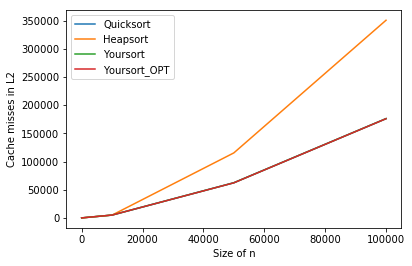

In [7]:
for i in range(len(L2_cache_misses_algo)):
    algo = L2_cache_misses_algo[i]
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Cache misses in L2')
    plt.savefig("A3_cache_misses_L2.pdf")

### Plot AMAT in L1 cache

Quicksort 
 [(10, 3.358036573628489), (100, 3.0768303705935525), (500, 3.046638352432086), (1000, 3.0409356359106927), (5000, 3.0752371924913406), (10000, 3.0972074919672945), (50000, 3.129237904480066), (100000, 3.1467880414721967)]
Heapsort 
 [(10, 3.322418136020151), (100, 3.044359097455593), (500, 3.024174018021425), (1000, 3.020846082476262), (5000, 3.0632580468193202), (10000, 3.0935254285251763), (50000, 3.15238964451057), (100000, 3.1725255503797074)]
Yoursort 
 [(10, 3.37029893924783), (100, 3.078128548716784), (500, 3.04716777945294), (1000, 3.04135319363797), (5000, 3.0760485548693075), (10000, 3.098283140294017), (50000, 3.1308789882946524), (100000, 3.1486888876950143)]
Yoursort_OPT 
 [(10, 3.4018475750577366), (100, 3.081736909323116), (500, 3.0501014583728705), (1000, 3.043960508674278), (5000, 3.0783192060907205), (10000, 3.100658088596405), (50000, 3.1325027884397545), (100000, 3.148869438734539)]


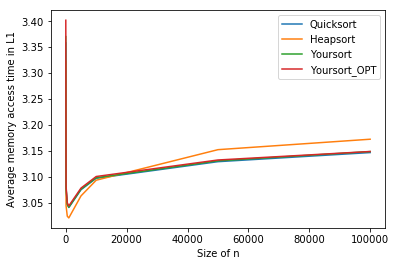

In [8]:
for i in range(len(L1_AMAT_algo)):
    algo = L1_AMAT_algo[i]
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Average memory access time in L1')
    plt.savefig("A3_AMAT_L1.pdf")

### Plot AMAT in L2 cache

Quicksort 
 [(10, 111.7741935483871), (100, 113.82352941176471), (500, 114.65635738831615), (1000, 114.63302752293578), (5000, 60.09007417873543), (10000, 47.63463398903579), (50000, 70.00939509690623), (100000, 79.41006651982056)]
Heapsort 
 [(10, 111.875), (100, 113.7012987012987), (500, 114.63898916967509), (1000, 114.62121212121212), (5000, 40.69684638860631), (10000, 31.03918065216004), (50000, 53.56750509311451), (100000, 63.71607035375657)]
Yoursort 
 [(10, 111.875), (100, 113.83720930232558), (500, 114.65753424657534), (1000, 114.63369963369964), (5000, 60.09977043969627), (10000, 47.638978459950984), (50000, 70.00890982550857), (100000, 79.41019674134569)]
Yoursort_OPT 
 [(10, 115.0), (100, 115.0), (500, 115.0), (1000, 114.81515711645102), (5000, 60.13950595343878), (10000, 47.86494925839188), (50000, 70.04534395045344), (100000, 79.51166867776992)]


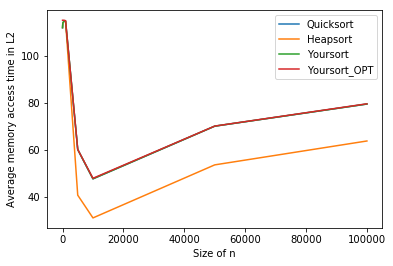

In [9]:
for i in range(len(L1_AMAT_algo)):
    algo = L2_AMAT_algo[i]
    name = names[i]
    print(name,"\n", algo)
    plt.plot(*zip(*algo), label=name)
    plt.legend()
    plt.xlabel('Size of n')
    plt.ylabel('Average memory access time in L2')
    plt.savefig("A3_AMAT_L2.pdf")

# Real performance  (assignment 1.2.3)

### Extracting all micro arch files and running times

In [10]:
# lists for data concerning three different micro architecture
quick_simple_times = [(1,1)]
heap_simple_times = [(1,1)]
your_simple_times = [(1,1)]
your_OPT_simple_times = [(1,1)]

quick_super_times = [(1,1)]
heap_super_times = [(1,1)]
your_super_times = [(1,1)]
your_OPT_super_times = [(1,1)]

quick_ooo_times = [(1,1)]
heap_ooo_times = [(1,1)]
your_ooo_times = [(1,1)]
your_OPT_ooo_times = [(1,1)]

simple_algo = [quick_simple_times,heap_simple_times,your_simple_times,your_OPT_simple_times]
super_algo = [quick_super_times,heap_super_times,your_super_times,your_OPT_super_times]
ooo_algo = [quick_ooo_times,heap_ooo_times,your_ooo_times,your_OPT_ooo_times]

all_arch = [simple_algo, super_algo, ooo_algo]
arch_names = ['simple','super','ooo']

# change directory to search in /data/
os.chdir("/Users/baunbaun/Documents/computersystemer_BAUN/compsys/A3/src/data")

# get the data of three micro architectures 
files = [[glob.glob("*simple*")],[glob.glob("*super*")],[glob.glob("*ooo*")]]

# extract data from each micro arch 
for i in range(len(files)):
    micro_arch = files[i][0]
    for file in micro_arch:
        
        f = open(file,"r");
        numbers = [int(s) for s in re.findall(r'\d+\d*', f.read())]
        n = [int(s) for s in re.findall(r'\d+\d*', file)][0]
        
        # running time is the last number in numbers
        time = numbers[len(numbers)-1:][0]
        tupl = (n,time) 

        # put data in the correct list
        if(re.search('quick',file)):
            simple_arch = all_arch[i][0]
            simple_arch.append(tupl)
        elif(re.search('heap',file)):
            heap_arch = all_arch[i][1]
            heap_arch.append(tupl)
        elif(re.search('yoursort_OPT',file)):
            your_OPT_arch = all_arch[i][2]
            your_OPT_arch.append(tupl)
        elif(re.search('yoursort',file)):
            your_arch = all_arch[i][3]
            your_arch.append(tupl)
        
        f.close()      
       
# sort lists by n and print the result
print("Micro architecture data: \n")
for j in range(len(simple_algo)):
    for i in range(len(all_arch)):
        all_arch[i][j] = sorted(all_arch[i][j], key=lambda tup: tup[0])
        print(names[j],arch_names[i], ":")
        for t in all_arch[i][j]:
            print(t, "\n")

Micro architecture data: 

Quicksort simple :
(1, 1) 

(10, 2671) 

(100, 17592) 

(500, 92026) 

(1000, 194583) 

(5000, 1131534) 

(10000, 2449637) 

(50000, 17738697) 

(100000, 42941395) 

Quicksort super :
(1, 1) 

(10, 2117) 

(100, 15862) 

(500, 83478) 

(1000, 176157) 

(5000, 1024251) 

(10000, 2221814) 

(50000, 16539631) 

(100000, 40386259) 

Quicksort ooo :
(1, 1) 

(10, 2121) 

(100, 14252) 

(500, 70505) 

(1000, 143845) 

(5000, 796765) 

(10000, 1676655) 

(50000, 12124451) 

(100000, 27248669) 

Heapsort simple :
(1, 1) 

(10, 2807) 

(100, 22424) 

(500, 135993) 

(1000, 298393) 

(5000, 1910240) 

(10000, 4245411) 

(50000, 35372556) 

(100000, 87138162) 

Heapsort super :
(1, 1) 

(10, 1845) 

(100, 18428) 

(500, 113228) 

(1000, 249252) 

(5000, 1618510) 

(10000, 3621535) 

(50000, 31770960) 

(100000, 79510688) 

Heapsort ooo :
(1, 1) 

(10, 1726) 

(100, 14579) 

(500, 82131) 

(1000, 178220) 

(5000, 1142518) 

(10000, 2556915) 

(50000, 24651076) 

(100000,

In [11]:
### Plot running times for three micro architectures of four algorithms (12 in all)

Q-sort si 
 [(1, 1), (10, 2671), (100, 17592), (500, 92026), (1000, 194583), (5000, 1131534), (10000, 2449637), (50000, 17738697), (100000, 42941395)]
Q-sort su 
 [(1, 1), (10, 2117), (100, 15862), (500, 83478), (1000, 176157), (5000, 1024251), (10000, 2221814), (50000, 16539631), (100000, 40386259)]
Q-sort oo 
 [(1, 1), (10, 2121), (100, 14252), (500, 70505), (1000, 143845), (5000, 796765), (10000, 1676655), (50000, 12124451), (100000, 27248669)]
H-sort si 
 [(1, 1), (10, 2807), (100, 22424), (500, 135993), (1000, 298393), (5000, 1910240), (10000, 4245411), (50000, 35372556), (100000, 87138162)]
H-sort su 
 [(1, 1), (10, 1845), (100, 18428), (500, 113228), (1000, 249252), (5000, 1618510), (10000, 3621535), (50000, 31770960), (100000, 79510688)]
H-sort oo 
 [(1, 1), (10, 1726), (100, 14579), (500, 82131), (1000, 178220), (5000, 1142518), (10000, 2556915), (50000, 24651076), (100000, 64052386)]
Y-sort si 
 [(1, 1), (10, 2583), (100, 17087), (500, 91241), (1000, 193685), (5000, 1146807),

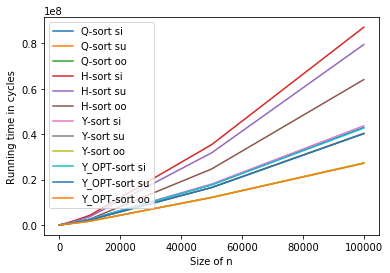

In [12]:
short_names = ['Q-sort','H-sort','Y-sort','Y_OPT-sort']
const_name = "file name holder"
for j in range(len(simple_algo)):
    for i in range(len(all_arch)):
        arch_list = all_arch[i][j]
        const_name = short_names[j]+" "+arch_names[i][:2] 
        print(const_name,"\n",arch_list)
        plt.plot(*zip(*arch_list), label=const_name)
        plt.legend()
        plt.xlabel('Size of n')
        plt.ylabel('Running time in cycles')
        title = "A3_running_time"+const_name+".pdf"
        plt.savefig(title)